In [281]:
#**********************************
# Interpolation Methods Demo
# Take SISR test images and evaluate accuracy of interpolation-based
#  scaling methods.
# 
# Manuel Serna-Aguilera
# Spring 2021
#**********************************


In [282]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data, img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim


In [283]:
# Get a test image
#in_name = '0873.png' # from DIV2K
#in_name = 'baboon.png' # from Set14
in_name = 'butterfly.png' # from Set5
#in_name = 'img_005.png' # Urban100
#in_name = 'MoeruOnisan_vol01.png' # from Manga109
img_name = 'images/test/' + in_name


In [284]:
# Get ground truth and then get downscaled image
true_img = cv2.imread(img_name)

true_h = true_img.shape[0]
true_w = true_img.shape[1]

#scale = 0.5 # scale by 1/2
scale = 0.25 # scale by 1/4
#scale = 0.125 # scale by 1/8
small_h = int(scale * true_h)
small_w = int(scale * true_w)

downscaled_img = cv2.resize(true_img, (small_w, small_h), 0, 0, interpolation=cv2.INTER_CUBIC)


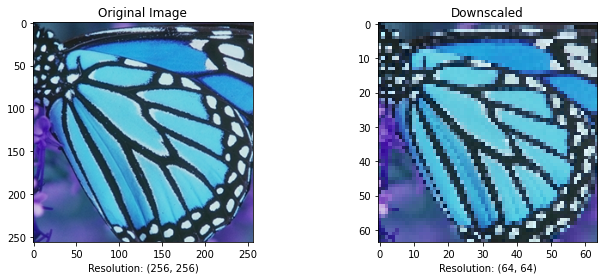

In [285]:
# Plot our two images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = axes.ravel()
label = 'Resolution: ({:2d}, {:2d})'

# Original
ax[0].imshow(true_img)
ax[0].set_xlabel(label.format(true_h, true_w))
ax[0].set_title('Original Image')

# Downscaled
ax[1].imshow(downscaled_img)
ax[1].set_xlabel(label.format(small_h, small_w))
ax[1].set_title('Downscaled')

plt.tight_layout()
plt.show()


In [286]:
# Upscale downscaled image using:
# 1. Nearest Neighbors
nn_img = cv2.resize(downscaled_img, (true_w, true_h), 0, 0, interpolation=cv2.INTER_NEAREST)

# 2. Bilinear interpolation
bl_img = cv2.resize(downscaled_img, (true_w, true_h), 0, 0, interpolation=cv2.INTER_LINEAR)

# 3. Bicubic interpolation
bc_img = cv2.resize(downscaled_img, (true_w, true_h), 0, 0, interpolation=cv2.INTER_CUBIC)


Text(0.5, 1.0, 'Bicubic')

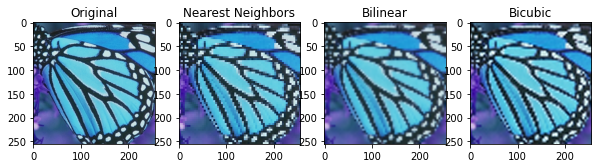

In [287]:
# Plot results
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(true_img)
ax[0].set_title('Original')

ax[1].imshow(nn_img)
ax[1].set_title('Nearest Neighbors')

ax[2].imshow(bl_img)
ax[2].set_title('Bilinear')

ax[3].imshow(bc_img)
ax[3].set_title('Bicubic')


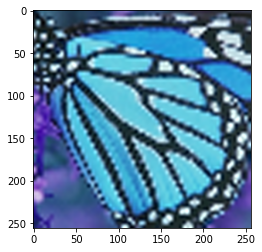

In [288]:
# Plot interpolated image by itself
plt.imshow(bc_img)


In [289]:
# Evaluate image using PSNR and SSIM scores

# Nearest neighbors scores
nn_psnr = psnr(true_img, nn_img, data_range=nn_img.max()-nn_img.min())
nn_ssim = ssim(true_img, nn_img, data_range=nn_img.max()-nn_img.min(), multichannel=True)

# Bilinear scores
bl_psnr = psnr(true_img, bl_img, data_range=bl_img.max()-bl_img.min())
bl_ssim = ssim(true_img, bl_img, data_range=bl_img.max()-bl_img.min(), multichannel=True)

# Bicubic scores
bc_psnr = psnr(true_img, bc_img, data_range=bc_img.max()-bc_img.min())
bc_ssim = ssim(true_img, bc_img, data_range=bc_img.max()-bc_img.min(), multichannel=True)


In [290]:
print('Nearest neighbors scores:')
print('PSNR: {}'.format(nn_psnr))
print('SSIM: {}'.format(nn_ssim))
print()

print('Bilinear scores:')
print('PSNR: {}'.format(bl_psnr))
print('SSIM: {}'.format(bl_ssim))
print()

print('Bicubic neighbors scores:')
print('PSNR: {}'.format(bc_psnr))
print('SSIM: {}'.format(bc_ssim))
print()


Nearest neighbors scores:
PSNR: 17.676438794962937
SSIM: 0.6524274197320605

Bilinear scores:
PSNR: 19.76491318293882
SSIM: 0.7127472117402256

Bicubic neighbors scores:
PSNR: 19.996551930084316
SSIM: 0.7101360699921085

